In [14]:
import numpy as np
import scipy as sp
import math
from matplotlib import pyplot as plt

Для показательства того, что имеет место сходимость:
$$\sup_{x}|F_n(x) - F(x)| \xrightarrow[n \rightarrow \infty]{P} 0$$
воспользуемся нормальным распределением с плотностью и функцией распределения вида:
$$p(x)=\frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{x-\mu}{2\sigma^2}}$$
$$F(x)=\frac{1}{2} \left(1 + erf\left(\frac{x - \mu}{\sigma \sqrt{2}}\right)\right)$$
Где $erf(x)$ - функция ошибок.

Соответственно, зададим значения математического ожидания $\mu=E$, дисперсии $D=\sigma^2$, максимальное число элементов выборки $N$, интервал x_interval, на котором мы будем проверять сходимость, возьмём $eps=\varepsilon>0$, и посчитаем аналитические значения функции распределения F_x=$F(x)$ нормального распределения на рассматриваемом интервале. Также заранее заготовим массив $P$, в котором мы будем хранить вероятности $P\left(\sup_{x}|F_n(x) - F(x)| \ge \varepsilon \right)$.

In [15]:
E = 1 # математическое ожидание
D = 0.5 # дисперсия
N = 500 # максимальное число элементов выборки
P = [] # массив вероятностей
eps = 10 ** (-1) # произвольный epsilon > 0

x_interval = np.linspace(E - 3 * math.sqrt(D), E + 3 * math.sqrt(D), 10000) # интервал x, на котором будем смотреть сходимость 
                                                                            # (в данном случае от E-3sigma до E+3sigma)
F_x = [0.5 * (1 + math.erf((x - E) / math.sqrt(2 * D))) for x in x_interval] # аналитическая функция распределения нормального распределения

Моделирование будем проводить следующим образом. Будем рассматривать различные размеры выборок $n = 1,...,N$. 

Так как мы моделируем сходимость по вероятности, то поступим следующим образом. При каждом размере $n$ выборки будем генерировать $M$ (в данном случае 50) различных выборок sample длины $n$ из нормального распределения, считать для каждой из $M$ выборок эмпирическую функцию распределения F_n_x, а затем будем вычислять значение np.max(np.abs(F_n_x - F_x)), то есть по сути $\sup_{x}|F_n(x) - F(x)|$ (таких значений тоже будет $M$ при каждом значении длины выборки $n$). Затем из M значений $\sup_{x}|F_n(x) - F(x)|$ будем брать лишь те $k$ значений, для которых верно $\sup_{x}|F_n(x) - F(x)| \ge \varepsilon$. После чего будем считать итоговые вероятности $P\left(\sup_{x}|F_n(x) - F(x)| \ge \varepsilon \right)$ как отношение $\frac{k}{M}$. Эти вероятности должны будут стремиться к 0 при увеличении размера выборки $n$.

Примечание: при данных M и N вычисление (лично на моём ноутбуке) производятся не мгновенно - нужно немножко подождать.

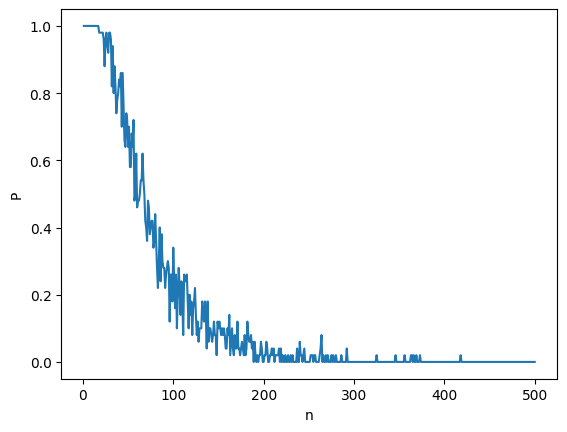

In [16]:
P = [] # массив вероятностей того
M = 50
for n in range(1, N + 1): # цикл по размеру выборки
    supremum = [] # массив супремумов из теоремы Гливенко-Кантелли
    for m in range(1, M + 1): # генерирование M выборок длины n из нормального распределения
        sample = np.random.normal(E, math.sqrt(D), n) # выборка длины n из нормального распределения
        F_n_x_scipy_obj = sp.stats.ecdf(sample)
        F_n_x = F_n_x_scipy_obj.cdf.evaluate(x_interval) # эмпирическая функция распределения выборки
        supremum.append(np.max(np.abs(F_n_x - F_x))) # вычисление супремума
    supremum = np.array(supremum)
    P.append(len(supremum[supremum >= eps]) / M) # вероятность того, что супремум больше, либо равен eps - эти вероятности должны стремиться к 0
# строим график вероятностей - видим стремление к 0 при увеличении размера выборки
plt.plot(list(range(1, N + 1)), P)
plt.xlabel('n')
plt.ylabel('P')
plt.show()